# TP4 Machine Learning :

In [2]:
# ! pip install pandas_profiling
# ! pip install ydata_profiling
# ! pip install pandasgui

In [3]:
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
# import pandas-profiling
import seaborn as sns
pastel_palette = sns.color_palette("pastel")

In [4]:
# Partie 1: Données de travail
fromage = pd.read_table(r"fromage1.txt", sep="\t", header=0, index_col=0)
print(fromage.describe())

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

In [5]:
# profile = pandas_profiling.ProfileReport(fromage)
# profile.to_file("fromage_profile_report.html")  # Save the report to an HTML file

### Matrice de distribution de données : 

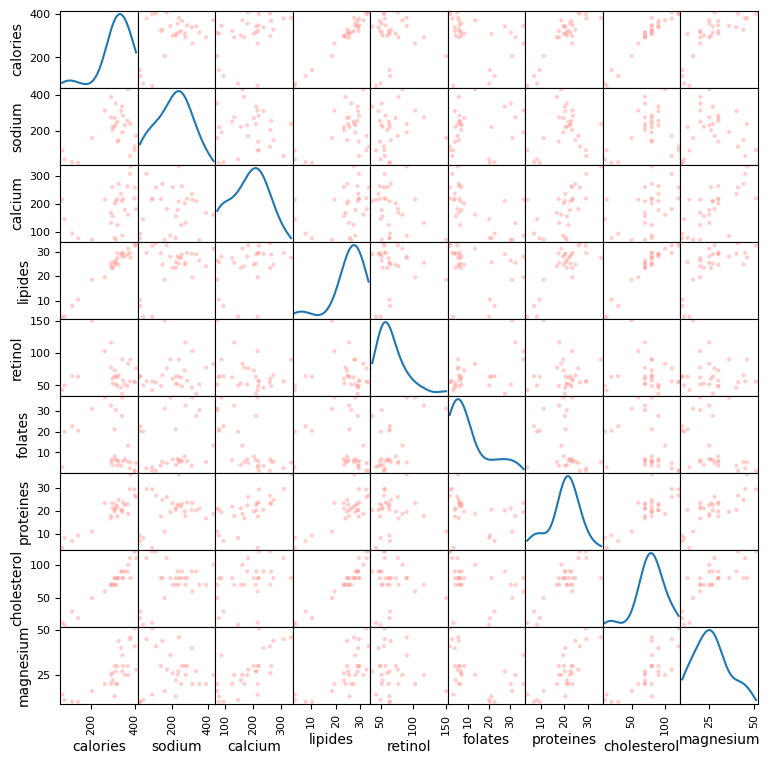

In [6]:
scatter_matrix(fromage, figsize=(9, 9), diagonal='kde', color=pastel_palette[3])
plt.show()


La matrice de dispersion montre des graphiques de dispersion pour chaque paire de variables les unes par rapport aux autres. Vous pouvez observer comment différentes caractéristiques sont liées les unes aux autres et identifier des schémas ou des corrélations potentielles. Par exemple, vous pouvez rechercher des regroupements de points, des relations linéaires ou d'autres motifs dans les graphiques de dispersion.

## Partie 2: K-means : 

In [7]:
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(fromage)
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(fromage.index[idk], kmeans.labels_[idk]))
print(kmeans.transform(fromage))

c:\Users\HP OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


             Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1         SaintPaulin
1             Cheddar
1               Comte
1                Edam
1            Emmental
1            Vacherin
1            Parmesan
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat.
3           Maroilles
3             Morbier
3              Cantal
3           Camembert
3            Pyrenees
3           Reblochon
3          Rocquefort
3                Bleu
3             Babybel
3         Fr.fondu.45
[[123.59715669 285.36163076 384.27301005 145.46927992]
 [110.54651897 118.43379084 303.10311983  71.72681089]
 [235.25665316  56.72603293 349.91323389 218.1879268 ]
 [159.09984736 200.30401971 393.76898843  45.60922494]
 [141.19170858 210.31138298 332.43471728  84.66051854]
 [180.75982487 111.73150994 371.97076666  86.99931839]
 [ 72.0404

In [8]:
res = np.arange(9, dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(fromage)
    res[k] = metrics.silhouette_score(fromage, km.labels_)

c:\Users\HP OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\

### La métrique Silhouette :

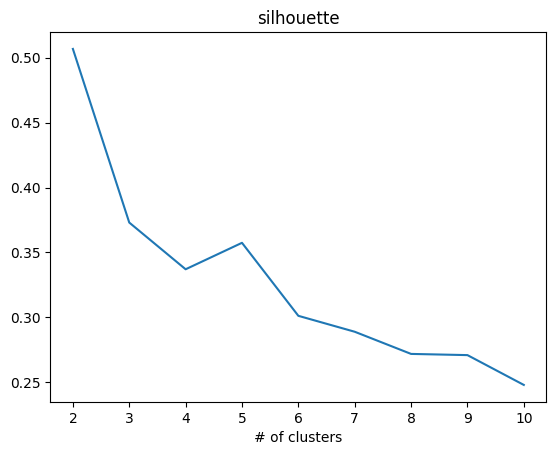

In [9]:
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2, 11, 1), (res))
plt.show()

* Le score de silhouette mesure la séparation entre les clusters. Il varie de -1 à 1, où une valeur élevée indique des clusters bien définis.
* Les meilleures valeurs de K sont 3 et 5.
* 2 est mauvais car nous n'avons pas effectué de classification.
* La distance intra-intercluster augmente lorsque les clusters sont très proches les uns des autres, tandis qu'elle diminue lorsque les clusters sont éloignés.
* Chaque fois que nous augmentons le nombre de clusters, la valeur de la silhouette peut augmenter, mais cela ne signifie pas nécessairement que nous devons augmenter le nombre de clusters.
* Pour k=3, il peut y avoir des cas particuliers où nous avons seulement 2 classes, dans ce cas, une validation par un expert est nécessaire pour effectuer l'analyse.


### La métrique Elbow / Coude :

c:\Users\HP OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\

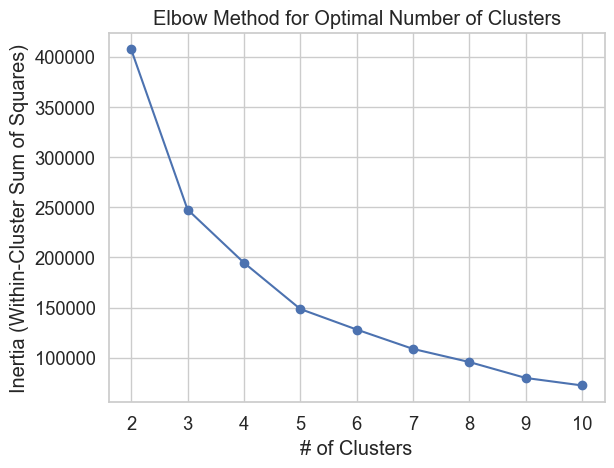

In [21]:
inertia_values = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(fromage)
    inertia_values.append(kmeans.inertia_)

plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("# of Clusters")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.show()

* 4 conflit distances : distance inter cluster devient plus importante
* 5 est meilleure mais il faut valider par un expert

## Partie 3: Classification ascendante hiérarchique (CAH)

* Calcul de la distance intra-cluster
* Paramètres t et color_threshold : seuil à partir duquel la couleur change dans le dendrogramme

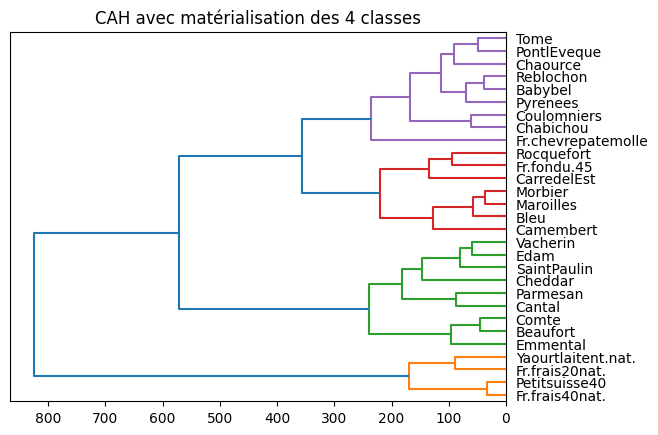

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [11]:
Z = linkage(fromage, method='ward', metric='euclidean')
plt.title("CAH")
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z, labels=fromage.index, orientation='left', color_threshold=255)
plt.show()
groupes_cah = fcluster(Z, t=255, criterion='distance')
print(groupes_cah)
idg = np.argsort(groupes_cah)
print(pd.DataFrame(fromage.index[idg], groupes_cah[idg]))

* Correspondance entre les groupes de la CAH et les clusters de Kmeans

In [12]:
correspondance = pd.crosstab(pd.Series(groupes_cah, name='CAH'),pd.Series(kmeans.labels_, name='Kmeans'))
print(correspondance)

Kmeans  0  1  2  3
CAH               
1       0  0  4  0
2       0  8  0  1
3       1  0  0  6
4       6  0  0  3


* Les différences me permettent de choisir Kmeans ou CAH

## Partie 4: Interprétation des classes avec PCA

In [13]:
from sklearn.decomposition import PCA

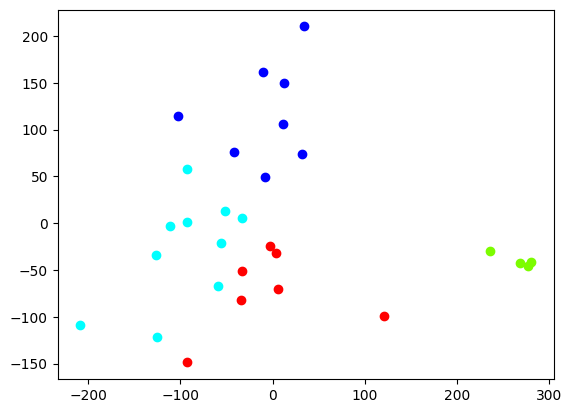

In [14]:
acp = PCA(n_components=2).fit_transform(fromage)
for couleur, k in zip(['red', 'blue', 'lawngreen', 'aqua'], [0, 1, 2, 3]):
    plt.scatter(acp[kmeans.labels_ == k, 0], acp[kmeans.labels_ == k, 1], c=couleur)
plt.show()

* L'ACP permet de représenter graphiquement les individus dans un espace de dimension réduite (ici, 2D). Chaque point représente un fromage, et sa position est déterminée par ses composantes principales. Les points sont colorés selon les clusters obtenus avec K-Means. 
* On observe ainsi la distribution des fromages dans le plan factoriel de l'ACP en fonction de leur regroupement par K-Means.
* On a reduction mais pas de perte d'informations.

## Clustering CAH:

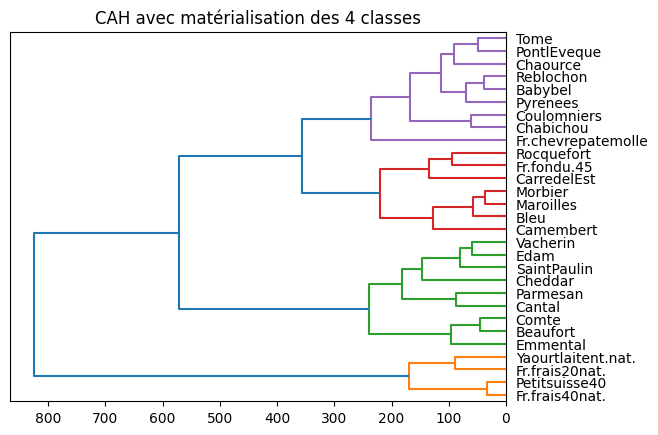

In [15]:
# Perform CAH
Z = linkage(fromage, method='ward', metric='euclidean')

# Display the dendrogram
plt.title("CAH avec matérialisation des 4 classes")
dendrogram(Z, labels=fromage.index, orientation='left', color_threshold=255) # color_threshold yit7akim fi nombre de classe 
plt.show()


Les résultats de la CAH sont interprétés à partir du dendrogramme et de l'assignation des individus à des groupes. Le dendrogramme illustre les fusions successives des clusters, et la hauteur des branches indique la distance entre les clusters.

In [16]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering.fit(fromage)
result_clusters = clustering.labels_

print("Original CAH clusters:", result_clusters)
print("Scikit-learn CAH clusters:", clustering.labels_)
print("Original CAH clusters:", groupes_cah)

idg = np.argsort(clustering.labels_)
print(pd.DataFrame(fromage.index[idg],clustering.labels_[idg]))

Original CAH clusters: [1 2 0 1 1 0 2 2 0 0 2 0 0 2 1 3 3 1 1 0 3 2 2 2 1 0 2 0 3]
Scikit-learn CAH clusters: [1 2 0 1 1 0 2 2 0 0 2 0 0 2 1 3 3 1 1 0 3 2 2 2 1 0 2 0 3]
Original CAH clusters: [3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
0         SaintPaulin
0            Beaufort
0            Parmesan
0              Cantal
0             Cheddar
0               Comte
0            Vacherin
0                Edam
0            Emmental
1         CarredelEst
1          Rocquefort
1             Morbier
1           Maroilles
1         Fr.fondu.45
1           Camembert
1                Bleu
2         Coulomniers
2            Chaource
2           Chabichou
2         PontlEveque
2            Pyrenees
2           Reblochon
2             Babybel
2                Tome
2  Fr.chevrepatemolle
3      Fr.frais20nat.
3      Fr.frais40nat.
3       Petitsuisse40
3  Yaourtlaitent.nat.


c:\Users\HP OMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


##### la correspondance entre les groupes de la CAH et les clusters de Kmeans

In [17]:
pd.crosstab(clustering.labels_,kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
0,0,8,0,1
1,1,0,0,6
2,6,0,0,3
3,0,0,4,0


In [18]:
pd.crosstab(groupes_cah,clustering.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,0,0,4
2,9,0,0,0
3,0,7,0,0
4,0,0,9,0


* Les lignes représentent les groupes de la CAH, et les colonnes représentent les clusters de K-Means. 
* Cette table montre combien d'individus appartiennent à chaque combinaison de groupe CAH et cluster K-Means.

## Diana Implementation : 

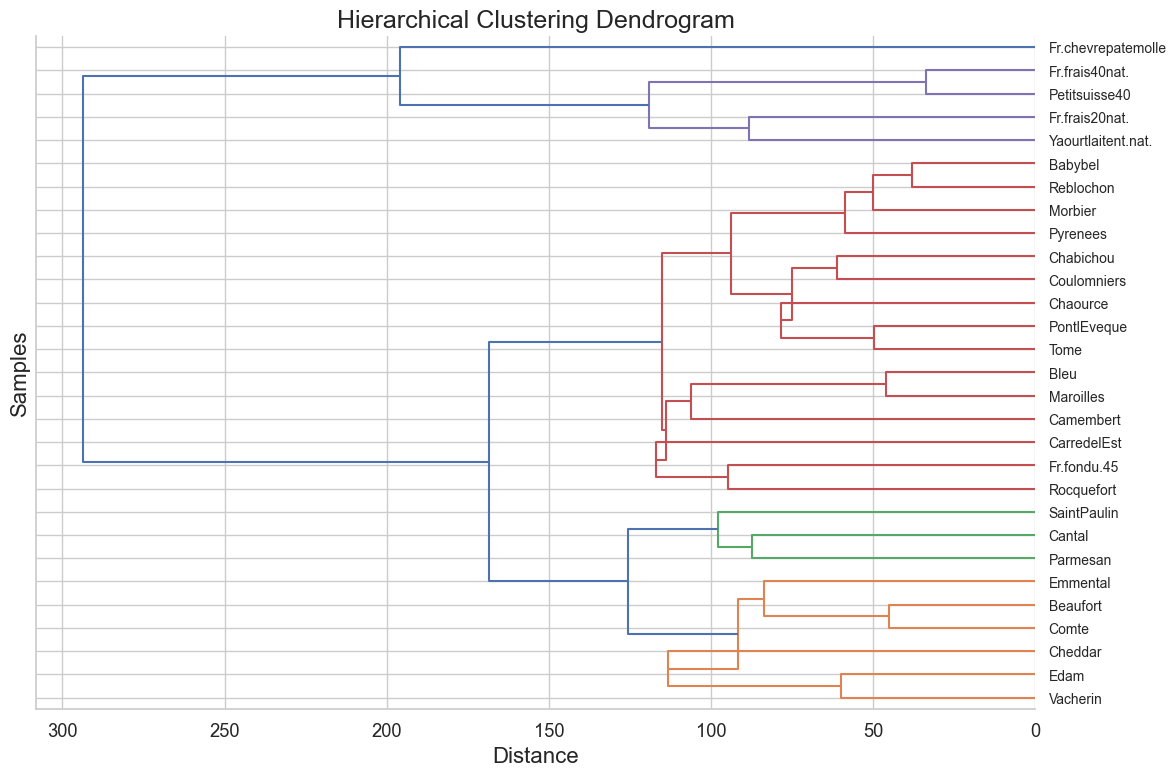

In [20]:
def DIANA_KMeans():
    # Function to split a group into two clusters using K-Means
    def split(group):
        np.random.seed(0)
        # Apply K-Means clustering to the group with 2 clusters
        kmeans = cluster.KMeans(n_clusters=2, n_init=10).fit(group)
        # Separate the data points into two clusters
        cluster0 = group[kmeans.labels_ == 0]
        cluster1 = group[kmeans.labels_ == 1]

        # Calculate the Euclidean distance between the cluster centers
        distance = metrics.pairwise.euclidean_distances(
            [kmeans.cluster_centers_[0]], [kmeans.cluster_centers_[1]])
        return [cluster0, cluster1, distance[0][0]]

    # Function to adjust linkage pointers for negative indices
    def adjust_linkage_pointers(linkage, n_samples):
        adjusted_linkage = []
        for i, [index0, index1, distance, size] in enumerate(linkage):
            # Adjust negative indices to represent actual indices
            if index0 < 0:
                index0 = n_samples + i + index0
            if index1 < 0:
                index1 = n_samples + i + index1
            adjusted_linkage.append([float(index0), float(index1), float(distance), float(size)])

        return adjusted_linkage

    # Initialize groups with the original dataset
    groups = [fromage]

    # Initialize an empty linkage list to store clustering information
    linkage = []
    i = 0

    # Iterate until all groups are processed
    while i < len(groups):
        current_group = groups[i]
        # Split the current group into two clusters using K-Means
        [cluster0, cluster1, distance] = split(current_group)

        # Determine indices for linkage based on the split clusters
        if len(cluster0) == 1:
            index0 = fromage.index.get_loc(cluster0.index[0])
            if len(cluster1) == 1:
                index1 = fromage.index.get_loc(cluster1.index[0])
            else:
                index1 = i - len(groups)
                groups.append(cluster1)
        else:
            index0 = i - len(groups)
            if len(cluster1) == 1:
                index1 = fromage.index.get_loc(cluster1.index[0])
            else:
                index1 = i - len(groups) - 1
                groups.append(cluster1)
            groups.append(cluster0)

        # Record the linkage information for the clusters
        size = len(current_group)
        linkage.insert(0, [index0, index1, distance, size])

        i += 1

    # Adjust linkage pointers for negative indices
    linkage = adjust_linkage_pointers(linkage, len(fromage))

    # Plot the hierarchical clustering dendrogram
    plt.figure(figsize=(12, 8))
    sns.set(style='whitegrid', font_scale=1.2)
    dendrogram(linkage, labels=fromage.index, orientation='left', color_threshold=125)

    # Add labels and title to the plot
    plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
    plt.xlabel('Distance', fontsize=16)
    plt.ylabel('Samples', fontsize=16)

    # Adjust layout and display the plot
    plt.tight_layout()
    sns.despine()
    plt.show()

# Call the DIANA_KMeans function to execute the clustering and visualization
DIANA_KMeans()


Le code initialise une liste groups avec l'ensemble du jeu de données en tant que premier groupe.

De manière itérative, il exécute l'algorithme DIANA (Divisive Analysis) :

1. Divise le groupe actuel en deux clusters en utilisant le regroupement K-Means.
2. Ajuste les indices pour la fusion des clusters en fonction de leurs tailles respectives.
3. Met à jour les informations de liaison, y compris les indices, la distance et la taille, dans une liste appelée linkage.
4. Poursuit ce processus jusqu'à ce que tous les clusters aient une taille de 1.

* Le dendrogramme représente visuellement la structure hiérarchique de l'ensemble de données, montrant comment les échantillons sont regroupés en clusters à différents niveaux.
* Les clusters plus proches de la racine du dendrogramme représentent des groupes plus importants, et à mesure que l'on descend, les clusters se divisent en sous-ensembles plus petits et plus homogènes.
* La distance entre les branches du dendrogramme représente la dissimilarité entre les clusters, et le seuil de couleur * aide à identifier des groupes distincts.